
Main page to use the functionality of the program

Module 1) For reading csv file. Enter the file path of the dataset (readcsv.py)

Readcsv 

		Methods
		i) readcsv
		ii) getDataFrame
		iii) Viewcsv


Module 2) For feature extractions (FeatureExtraction.py)

Feature Extraction

		Methods
		1)rolling mean
		2)variance
		3)standard deviation
		4)skewness & kurtosis
        
Module 3) Implementation of STFT,FFT, Plotting


In [1]:

from FeatureExtraction import featureextraction
from readcsv import readcsv
from vibrationanalysis import vibrationanalysis
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
import datetime
from scipy.fftpack import fft
from scipy.signal import stft
import matplotlib.pyplot as plt

In [2]:
file_path = ''
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(filetypes=[("Two Column CSV","*.csv")])

print(file_path)
## Instance of read csv class initiated
rc = readcsv(file_path)

##Pandas dataframe
df = rc.getDataFrame(10000)

##View dataframe with optional parameter of passing number of rows to be displayed

rc.viewcsv(df)




E:/twiniot/dataset/Vibration.csv
Date         datetime64[ns]
Vibration           float64
dtype: object
                          Date  Vibration
520000 2020-05-01 09:36:40.000  -0.025412
520001 2020-05-01 09:36:40.010  -0.018678
520002 2020-05-01 09:36:40.020  -0.007956
520003 2020-05-01 09:36:40.030   0.002521
520004 2020-05-01 09:36:40.040   0.009009
...                        ...        ...
520095 2020-05-01 09:36:40.950  -0.012189
520096 2020-05-01 09:36:40.960  -0.011073
520097 2020-05-01 09:36:40.970  -0.007518
520098 2020-05-01 09:36:40.980  -0.005203
520099 2020-05-01 09:36:40.990  -0.003127

[100 rows x 2 columns]


In [3]:
print(type(df.Date))
print(df.dtypes)

<class 'pandas.core.series.Series'>
Date         datetime64[ns]
Vibration           float64
dtype: object


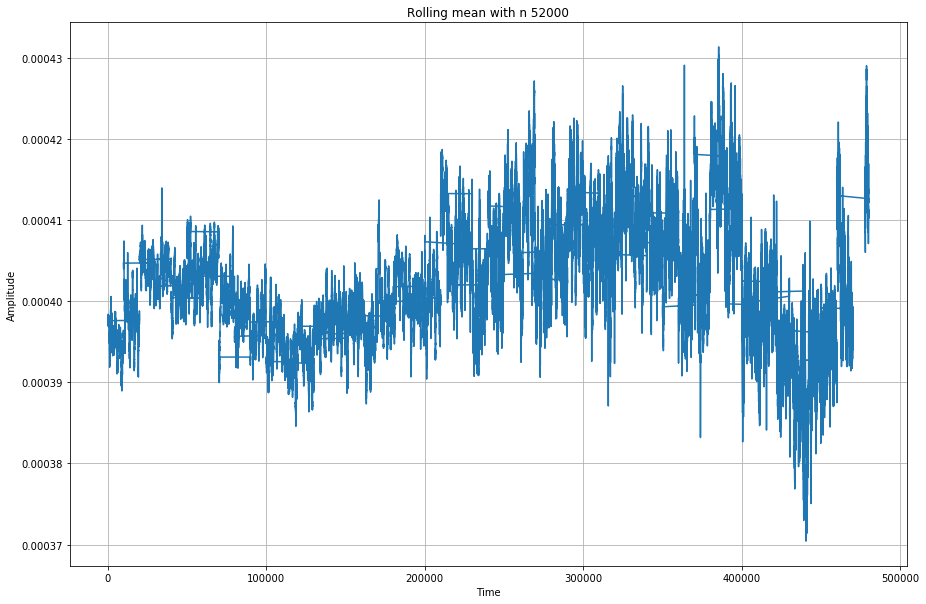


Rolling Mean
 520000         NaN
520001         NaN
520002         NaN
520003         NaN
520004         NaN
            ...   
9995      0.000396
9996      0.000396
9997      0.000396
9998      0.000396
9999      0.000396
Name: Vibration, Length: 524286, dtype: float64


In [4]:
##Feature extraction instance
fe = featureextraction(df)

#rolling mean
n = 52000
print("\nRolling Mean\n",fe.rollingmean(n,1))



In [5]:

##standard Deviation

print("\nStandard Deviation: ",fe.standarddeviation())

### Variance

print("\nVariance: ",fe.variance())

##skewness

print("\nSkewness",fe.skewness())

##Kurtosis
print("\nkurtosis",fe.kurtosis())


Standard Deviation:  0.007702051172322088

Variance:  5.932159226106804e-05

Skewness -0.8141956014343312

kurtosis 31.95054103168384


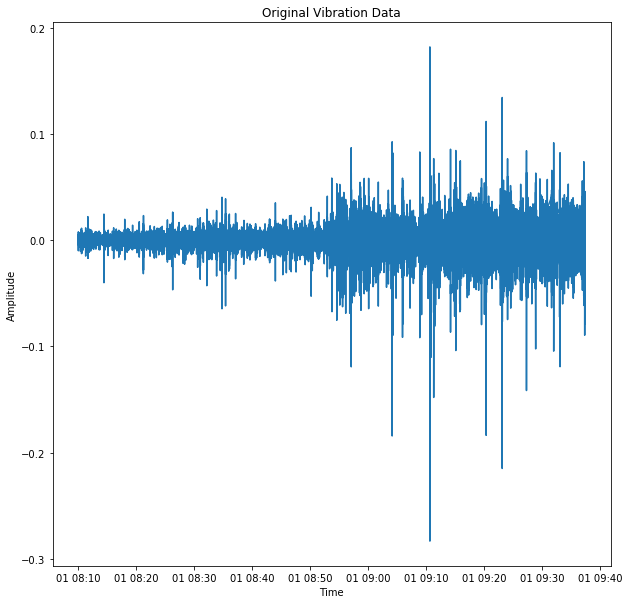

In [6]:
##FFT Module

v = vibrationanalysis(df)

v.plotbeforefft()

N 524286
F 100 Hertz
T 0.01 sec


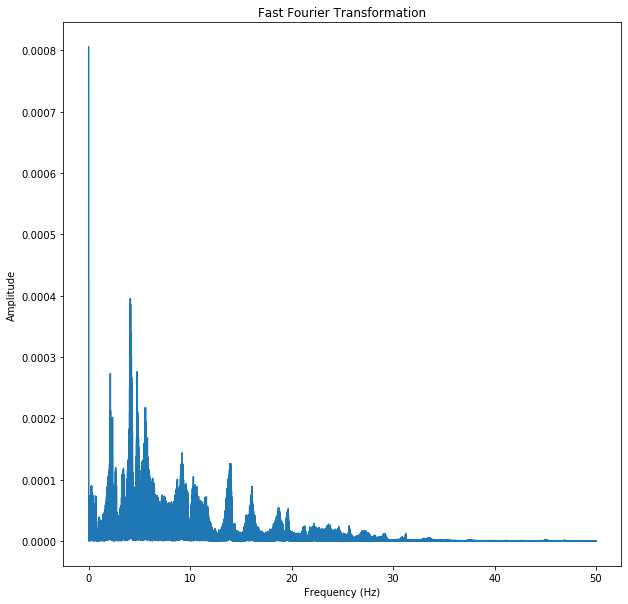

array([211.148479  -0.j        ,  -0.38019499-1.00227122j,
         0.48658765+1.02340892j, ...,   0.32077872-0.50958936j,
         0.48658765-1.02340892j,  -0.38019499+1.00227122j])

In [7]:
v.performfft()

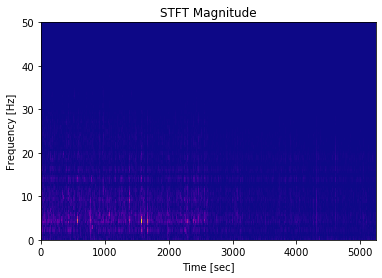

In [8]:
f,t,z = v.Short_time_fast_frequency(100,200)
